# Finance Exploratory Analysis Project

In this data project we will focus on exploratory data analysis of stock prices. Just a heads up, this project is just meant to practice my data visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

In [42]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Gathering Data

In [ ]:
We need to get data using pandas datareader. We will get stock information for the following banks:

    - Bank of America
    - CitiGroup
    - Goldman Sachs
    - JPMorgan Chase
    - Morgan Stanley
    - Wells Fargo


We will then convert the data from a string dtype to a datetime object, which will make the data more compatible and flexible to work with (for graphing, plotting, etc.).

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

We will now create a list of the ticker symbols in alphabetical order, which can later be used to iteratate through, when graphing data for data from all banks.

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

To create a comprehensive dataset containing the open, close, high, and low prices of all bank stocks, we will concatenate each individual dataframe together.

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584064  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227390  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270210  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220249  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241676  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558960  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583363  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680923  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717503  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095604  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242817  
2006-01-04   31.799999  31.530001  10870000.0  20.008028  
2006-01-05   31.500000  31.495001  10158000.0  19.985825  
2006-01-06   31.580000  31.680000   8403800.0  20.103210  
2006-01-09   31.674999  31.674999   5619600.0  20.100040  

[5 rows x 36 columns]

# EDA

Lets continue to explore the data. Below is the maximum closing price of each stock throughout the time period of data collection.

In [12]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

We will now create a dataframe named 'Returns', which will contain the returns for each stock. 
Returns can be defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

In [20]:
for ticker in tickers:
    returns[ticker+ ' return'] = bank_stocks[ticker]['Close'].pct_change()
    returns = returns.loc[:, 'BAC return':]
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


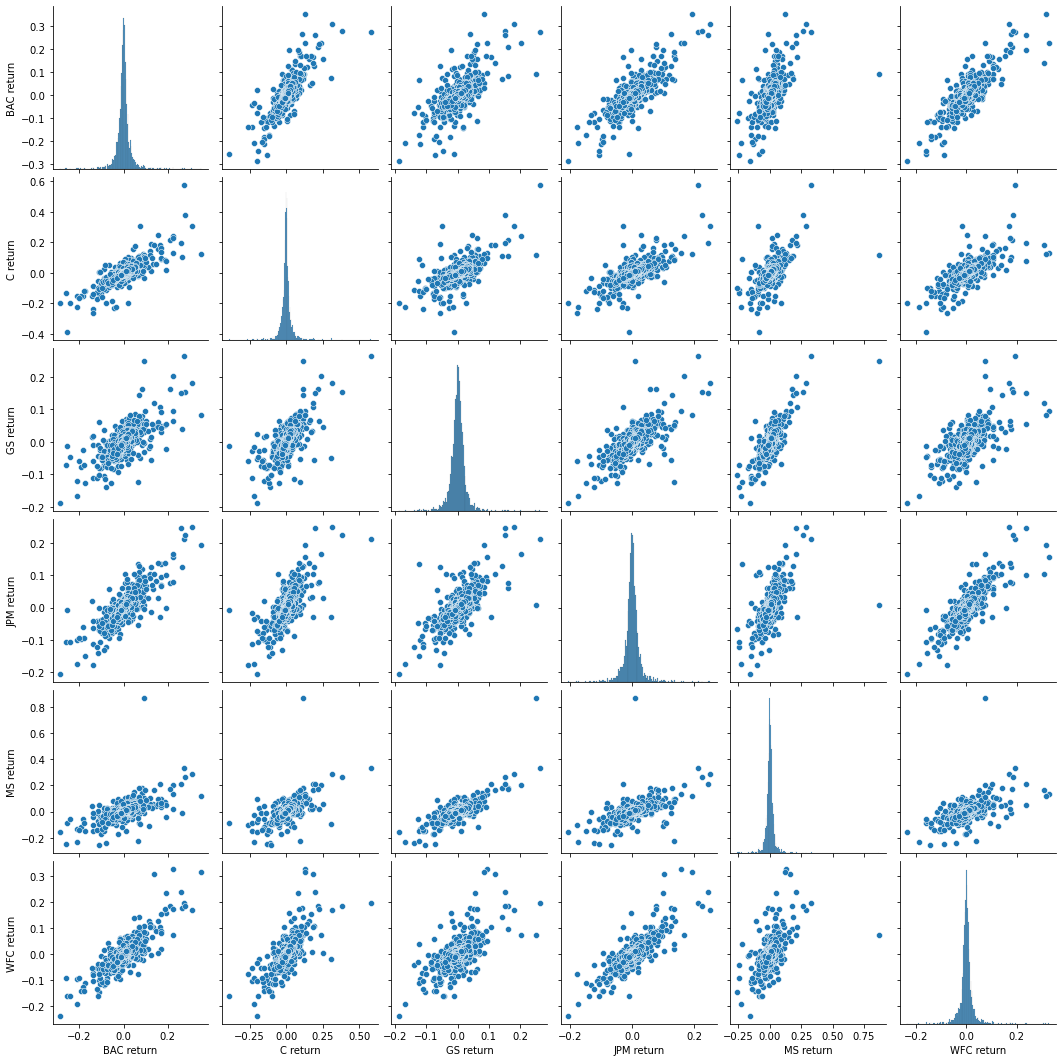

In [21]:
import seaborn as sns
sns.pairplot(returns[1:])

Using the 'Returns' dataframe, we can figure out on what dates each bank stock had the best and worst single day returns. 

Below are the banks' worst days according to their stock returns. Interestingly, BAC, Goldman Sachs, and JP Morgan stocks all had their worst returns on the day that Barack Obama was inaugurated as the 44th President.

In [22]:
returns.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

Below are the banks' best days accoridng to their stock returns.

In [23]:
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [ ]:
Below are the standard deviation of the returns.

In [25]:
returns.std()

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

CitiGroup can be classfied as the riskiest stock over the entire period since its returns were the farthest from the average.

In [27]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

However, in the year 2015, Morgan Stanley can be classified as the riskiest stock since its standard devaition is the highest, also meaning that its returns were the farthest from the average.

In [ ]:
Below is a distplot of the returns of all bank stocks in the year 2015.

/Users/nikhilkuniyil/Documents/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS return', ylabel='Density'>

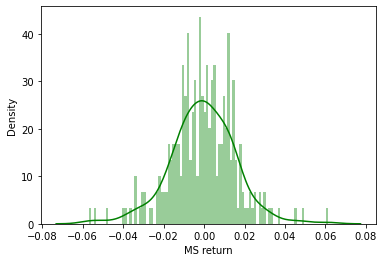

In [32]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31', 'MS return'], bins=100, color='green')

In [ ]:
Below is a distplot of the returns of all bank stocks in the year 2008.

/Users/nikhilkuniyil/Documents/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C return', ylabel='Density'>

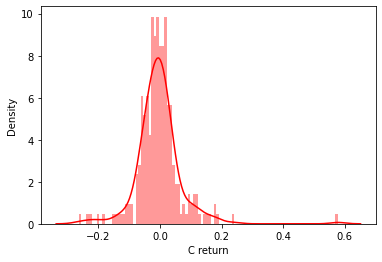

In [34]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31', 'C return'], bins=100, color='red')

# More Visualization

In [ ]:
We will continue to visualize the dataset through the use of various libraries and platforms. 

In [ ]:
Below is a line plot showing Close price for each bank for the entire index of time.

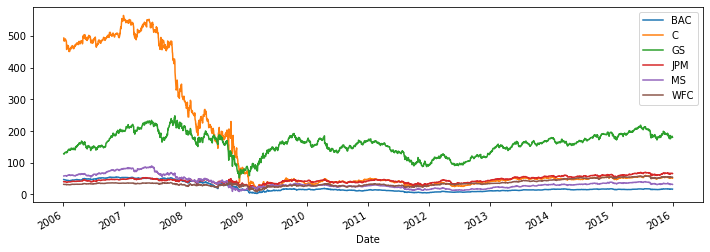

In [43]:
for ticker in tickers:
    bank_stocks[ticker]['Close'].plot(figsize=(12,4),label=ticker)
plt.legend()

# Moving Averages 

Let's analyze the moving average for these stocks in the year 2008.

Below is a plot of the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

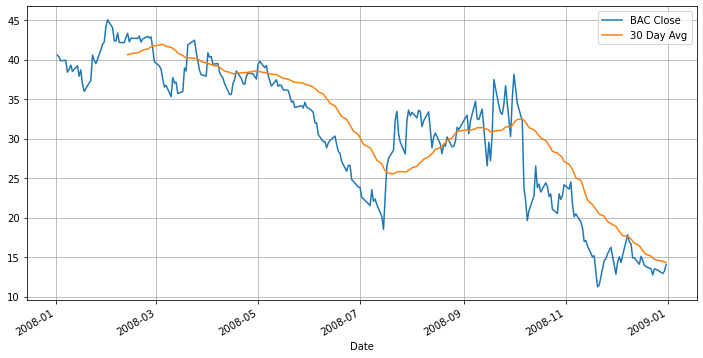

In [56]:
plt.figure(figsize=(12, 6))
bank_stocks['2008-01-01':'2008-12-31']['BAC']['Close'].plot(label='BAC Close', grid=True)
bank_stocks['2008-01-01':'2008-12-31']['BAC']['Close'].rolling(window=30).mean().plot(label='30 Day Avg', grid=True)
plt.legend()

In [ ]:
Finally, below is a heatmap of the correlation between the stocks Close Price. 

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

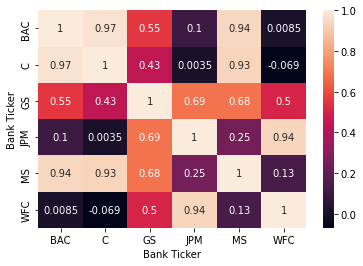

In [57]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)